In [1]:
import pandas as pd

# Load the CSV file into a DataFrame
data_path = 'combined_data.csv'
data = pd.read_csv(data_path)

# Display the first few rows of the DataFrame to understand its structure
data.head()

,anomaly_difficulty,automatic_detection_helpful,automatic_detection_helpful_explanation,history_helpful,history_helpful_explanation,difficult_v1,difficult_v2,difficult_v3,difficult_v4,preference_v1,preference_v2,preference_v3,preference_v4,issues_or_interruptions,participant,window,history,window+ad,history+ad
0,2,5.0,Gives you better focus point to find the anoma...,7,Patterns were easier spotted,1,2,3,4,4,3,2,1,-,4,0.32,0.46,0.41,0.56
1,2,6.0,I felt like I was missing it when the automati...,5,I used it to check the pattern again. Sometime...,1,4,3,2,4,2,3,1,"No, none.",6,0.77,0.90,0.97,0.96
2,2,5.0,I help getting my attention but I also had to ...,4,Only a couple of times,4,2,1,3,3,2,4,1,NaN,7,0.63,0.78,0.86,0.89
3,2,5.0,It did help me with finding anomalies which I ...,6,"If the blocks were closer to eachother, it was...",1,3,2,4,3,2,4,1,nope,8,0.44,0.60,0.68,0.85
4,1,5.0,they highlight ones that could potentially be ...,2,I felt distracted by it. wanting to compensate...,4,3,2,1,1,2,3,4,nope,9,0.86,0.77,0.42,0.71


In [2]:
data['preferred_version'] = data[['preference_v1', 'preference_v2', 'preference_v3', 'preference_v4']].idxmin(axis=1).str[-1].astype(int)
data['most_difficult_version'] = data[['difficult_v1', 'difficult_v2', 'difficult_v3', 'difficult_v4']].idxmin(axis=1).str[-1].astype(int)
# And now invert the difficulty values to find the easiest version
data['easiest_version'] = data[['difficult_v1', 'difficult_v2', 'difficult_v3', 'difficult_v4']].idxmax(axis=1).str[-1].astype(int)

In [3]:
data.head()

,anomaly_difficulty,automatic_detection_helpful,automatic_detection_helpful_explanation,history_helpful,history_helpful_explanation,difficult_v1,difficult_v2,difficult_v3,difficult_v4,preference_v1,...,preference_v4,issues_or_interruptions,participant,window,history,window+ad,history+ad,preferred_version,most_difficult_version,easiest_version
0,2,5.0,Gives you better focus point to find the anoma...,7,Patterns were easier spotted,1,2,3,4,4,...,1,-,4,0.32,0.46,0.41,0.56,4,1,4
1,2,6.0,I felt like I was missing it when the automati...,5,I used it to check the pattern again. Sometime...,1,4,3,2,4,...,1,"No, none.",6,0.77,0.90,0.97,0.96,4,1,2
2,2,5.0,I help getting my attention but I also had to ...,4,Only a couple of times,4,2,1,3,3,...,1,NaN,7,0.63,0.78,0.86,0.89,4,3,1
3,2,5.0,It did help me with finding anomalies which I ...,6,"If the blocks were closer to eachother, it was...",1,3,2,4,3,...,1,nope,8,0.44,0.60,0.68,0.85,4,1,4
4,1,5.0,they highlight ones that could potentially be ...,2,I felt distracted by it. wanting to compensate...,4,3,2,1,1,...,4,nope,9,0.86,0.77,0.42,0.71,1,4,1


C:\Users\s152296\AppData\Local\Temp\ipykernel_45208\529962354.py:28: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(data=version_data[f1_columns], palette="Set2", ax=ax, scale='width', cut=0)
C:\Users\s152296\AppData\Local\Temp\ipykernel_45208\529962354.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(f1_columns)
C:\Users\s152296\AppData\Local\Temp\ipykernel_45208\529962354.py:28: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(data=version_data[f1_columns], palette="Set2", ax=ax, scale='width', cut=0)
C:\Users\s152296\AppData\Local\Temp\ipykernel_45208\529962354.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(f1_columns)
C:\Users\s152296\AppData\Local\Temp\ipykernel_45

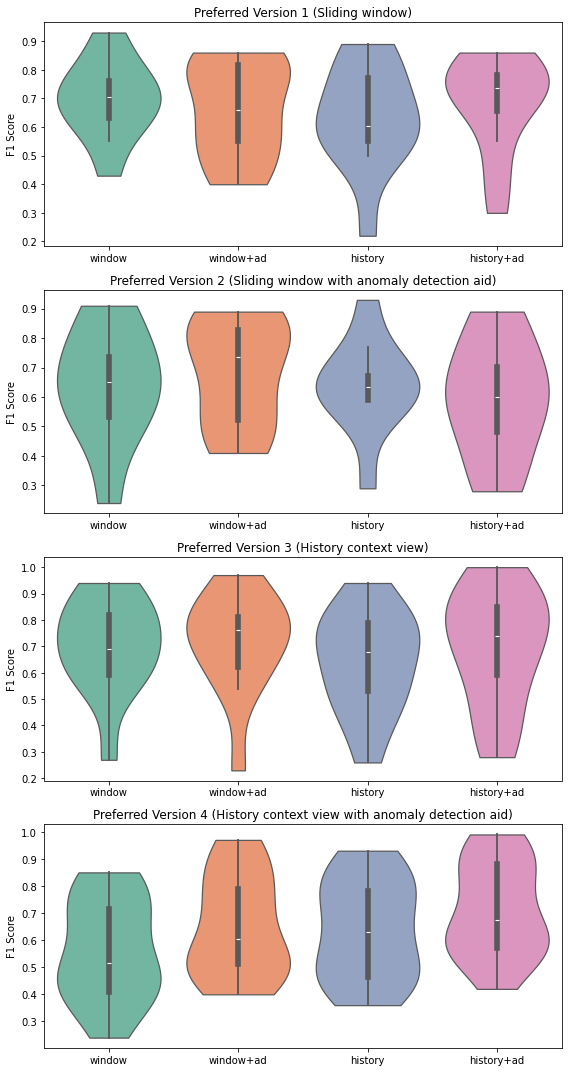

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the columns for F1 scores
f1_columns = ['window', 'window+ad', 'history', 'history+ad']

# Titles for each version
version_titles = {
    'v1': 'Version 1 (Sliding window)',
    'v2': 'Version 2 (Sliding window with anomaly detection aid)',
    'v3': 'Version 3 (History context view)',
    'v4': 'Version 4 (History context view with anomaly detection aid)'
}


# Create a figure with subplots (one for each version)
versions = data['preferred_version'].unique()
versions = sorted(versions)

fig, axes = plt.subplots(nrows=len(versions), figsize=(8, 15))  # Adjust the figsize as needed

# Iterate over each preferred_version
for ax, version in zip(axes, versions):
    # Filter the data for the current version
    version_data = data[data['preferred_version'] == version]
    
    # Create a violin plot for each F1 score column
    sns.violinplot(data=version_data[f1_columns], palette="Set2", ax=ax, scale='width', cut=0)

    # Add a title for the current version
    ax.set_title("Preferred " + version_titles[f'v{version}'])

    
    # Set the x-axis labels
    ax.set_xticklabels(f1_columns)
    
    # Label adjustments
    ax.set_ylabel('F1 Score')
    ax.set_xlabel('')

# Improve spacing between plots
plt.tight_layout()

# Display the plot
plt.show()

C:\Users\s152296\AppData\Local\Temp\ipykernel_45208\598466056.py:28: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(data=version_data[f1_columns], palette="Set2", ax=ax, scale='width', cut=0)
C:\Users\s152296\AppData\Local\Temp\ipykernel_45208\598466056.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(f1_columns)
C:\Users\s152296\AppData\Local\Temp\ipykernel_45208\598466056.py:28: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(data=version_data[f1_columns], palette="Set2", ax=ax, scale='width', cut=0)
C:\Users\s152296\AppData\Local\Temp\ipykernel_45208\598466056.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(f1_columns)
C:\Users\s152296\AppData\Local\Temp\ipykernel_45

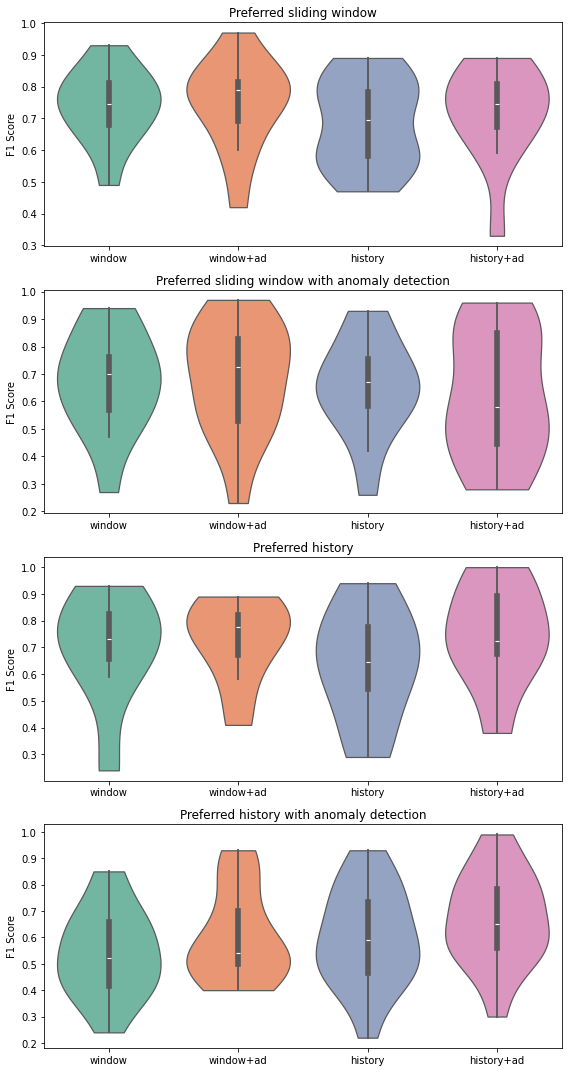

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the columns for F1 scores
f1_columns = ['window', 'window+ad', 'history', 'history+ad']

# Titles for each version
version_titles = {
    'v1': 'sliding window',
    'v2': 'sliding window with anomaly detection',
    'v3': 'history',
    'v4': 'history with anomaly detection'
}


# Create a figure with subplots (one for each version)
versions = data['preferred_version'].unique()
# sort versions
versions = sorted(versions)
fig, axes = plt.subplots(nrows=len(versions), figsize=(8, 15))  # Adjust the figsize as needed

# Iterate over each preferred_version
for ax, version in zip(axes, versions):
    # Filter the data for the current version
    version_data = data[data['easiest_version'] == version]
    
    # Create a violin plot for each F1 score column
    sns.violinplot(data=version_data[f1_columns], palette="Set2", ax=ax, scale='width', cut=0)

    # Add a title for the current version
    ax.set_title("Preferred " + version_titles[f'v{version}'])

    
    # Set the x-axis labels
    ax.set_xticklabels(f1_columns)
    
    # Label adjustments
    ax.set_ylabel('F1 Score')
    ax.set_xlabel('')

# Improve spacing between plots
plt.tight_layout()

# Display the plot
plt.show()